## `Timeseries Forecasting Of Nigeria Population`<br> <i>A Detailed Approch and Insight Drawn from Data</i>

In [28]:
# load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [29]:
# load the data
df = pd.read_csv('Population.csv')
df.head()

,Year,Population
0,1960,45053782
1,1961,45989310
2,1962,46965292
3,1963,47973575
4,1964,49012016


In [30]:
# check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Year        65 non-null     int64
 1   Population  65 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [31]:
# convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [32]:
# check the data information again
df.head()

,Year,Population
0,1960-01-01,45053782
1,1961-01-01,45989310
2,1962-01-01,46965292
3,1963-01-01,47973575
4,1964-01-01,49012016


In [33]:
# chose the y and ds columns
df_prophet = df.rename(columns={'Year': 'ds', 'Population': 'y'})
df_prophet.head()

,ds,y
0,1960-01-01,45053782
1,1961-01-01,45989310
2,1962-01-01,46965292
3,1963-01-01,47973575
4,1964-01-01,49012016


In [35]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

11:21:28 - cmdstanpy - INFO - Chain [1] start processing
11:21:28 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
# Create a dataframe for future predictions (e.g., next 10 years)
future = model.make_future_dataframe(periods=20, freq='Y')
forecast = model.predict(future)

c:\Users\johnn\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


In [50]:
# check the forecast data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
80,2039-12-31,3.082986e+08,3.023117e+08,3.154937e+08
81,2040-12-31,3.127001e+08,3.061104e+08,3.207005e+08
82,2041-12-31,3.174540e+08,3.102803e+08,3.262632e+08
83,2042-12-31,3.222504e+08,3.143805e+08,3.317501e+08
84,2043-12-31,3.270985e+08,3.185928e+08,3.372959e+08


### Explanation of the Prophet Forecast DataFrame
The forecast dataframe generated by Prophet contains several important columns:
- **ds**: The date for each prediction (timestamp).
- **yhat**: The predicted population value for each date. This is the main output of the model.
- **yhat_lower**: The lower bound of the prediction interval, representing the minimum likely value for the population at that date.
- **yhat_upper**: The upper bound of the prediction interval, representing the maximum likely value for the population at that date.

**How to use the dataframe:**
- For any given year, look for the row where `ds` matches the desired date (e.g., a date in 2050).
- Use the `yhat` value as the predicted population for that year.
- The `yhat_lower` and `yhat_upper` columns give you a range, showing the uncertainty in the prediction.
- The last rows of the dataframe show predictions for future years beyond your historical data.

This dataframe allows you to extract specific forecasts, analyze trends, and understand the confidence intervals for each prediction.

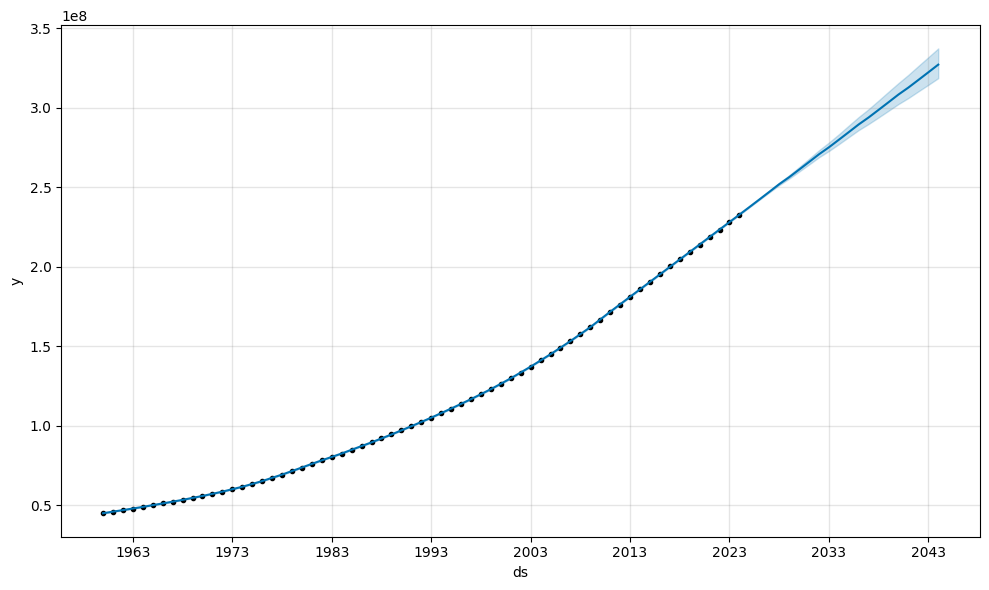

In [53]:
# Plot the forecast
model.plot(forecast)
plt.show()

### Explanation of the Prophet Forecast Chart
The chart produced by Prophet shows several key elements:
- **Black Dots**: These represent the actual historical population data points used to train the model.
- **Blue Line**: This is the model's forecast of Nigeria's population over time, including both the historical fit and future predictions.
- **Light Blue Shaded Area**: This region around the blue line indicates the uncertainty interval (confidence bounds) for the forecast. It shows the range within which the true population value is likely to fall, based on the model's estimation.
- **X-Axis (Date)**: Represents the years covered by the data and forecast, including future years like 2050.
- **Y-Axis (Population)**: Shows the population values, both observed and predicted.

**How to read the chart:**
- The blue line is the best estimate of population for each year.
- The black dots should closely follow the blue line in the historical period, indicating a good model fit.
- The width of the shaded area increases for future years, reflecting greater uncertainty in long-term predictions.
- For any specific year (e.g., 2050), use the blue line's value as the predicted population, and the shaded area to understand the possible range of values.

### Estimated Population for Nigeria (2025–2050)
For each year from 2025 to 2050, the forecast dataframe provides:
- **Estimated population (`yhat`)**: The best prediction for Nigeria's population in that year.
- **Lower bound (`yhat_lower`)**: The minimum likely value, representing the lower end of the confidence interval.
- **Upper bound (`yhat_upper`)**: The maximum likely value, representing the upper end of the confidence interval.

You can interpret the results as follows:
- For each year, the model gives a single best estimate and a range of possible values.
- The range (from lower to upper bound) reflects the uncertainty in the prediction—the further into the future, the wider this range may become.
- For example, if the forecast for 2030 is:
    - Estimated population: 250,000,000
    - Range: 245,000,000 to 255,000,000
  This means the model expects the population to be around 250 million, but it could reasonably be as low as 245 million or as high as 255 million.
- For 2050, the model will provide a similar estimate and range, helping you understand the expected population and the uncertainty for that year.
- This information helps you understand both the expected trend and the uncertainty in long-term forecasts.

In [56]:
# Display estimated population and range for each year from 2025 to 2043 as a table
import pandas as pd
years = list(range(2025, 2044))
results = []
for year in years:
    forecast_year = forecast[forecast['ds'].dt.year == year]
    if not forecast_year.empty:
        yhat = forecast_year['yhat'].values[0]
        yhat_lower = forecast_year['yhat_lower'].values[0]
        yhat_upper = forecast_year['yhat_upper'].values[0]
        results.append({'Year': year, 'Estimated Population': int(yhat), 'Lower Bound': int(yhat_lower), 'Upper Bound': int(yhat_upper)})
    else:
        results.append({'Year': year, 'Estimated Population': None, 'Lower Bound': None, 'Upper Bound': None})
df_results = pd.DataFrame(results)
df_results

,Year,Estimated Population,Lower Bound,Upper Bound
0,2025,242254495,242044427,242532749
1,2026,247050822,246686220,247578534
2,2027,251898964,251263896,252737058
3,2028,256300480,255402183,257486305
4,2029,261054383,259828957,262631466
5,2030,265850710,264266133,267866253
6,2031,270698852,268815452,273212415
7,2032,275100368,272774526,278087006
8,2033,279854271,277078266,283283515
9,2034,284650598,281524861,288760442
